<a href="https://colab.research.google.com/github/tuhinbasu/Stock-Portfolio-Project/blob/main/Stock_Portfolio_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [5]:
# Define the ticker list
ticker_list = ['TCS.NS', 'TATAMOTORS.NS', 'TATASTEEL.NS', '^NSEI']
start_date = "2008-01-01"
df_close = pd.DataFrame(columns= ticker_list) #will store the stock close price
df_volume = pd.DataFrame(columns = ticker_list) #will store the stock volumes

#downloading the close price and volume of the stocks
for ticker in ticker_list:
  df_close[ticker] = yf.download(ticker, start = start_date)["Close"]
  df_volume[ticker] = yf.download(ticker, start = start_date)["Volume"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
# Merging both the dataframes
# Creating a new volume column and then storing stock volume data into them
df_close["nse_volume"] = df_volume["^NSEI"]
df_close["tcs_volume"] = df_volume["TCS.NS"]
df_close["tatamotors_volume"] = df_volume["TATAMOTORS.NS"]
df_close["tatasteel_volume"] = df_volume["TATASTEEL.NS"]

# Renaming of the rest of the columns
df_stock = df_close.rename(columns = {"^NSEI":"nse_close", "TCS.NS":"tcs_close", "TATAMOTORS.NS":"tatamotors_close", "TATASTEEL.NS":"tatasteel_close"})
# Verifying the changes
df_stock.tail()

,tcs_close,tatamotors_close,tatasteel_close,nse_close,nse_volume,tcs_volume,tatamotors_volume,tatasteel_volume
Date,,,,,,,,
2025-01-17,4124.299805,779.750000,130.279999,23203.199219,272900.0,1761466,7007239,27421959
2025-01-20,4077.800049,774.349976,131.660004,23344.750000,301500.0,1287799,9956101,20571916
2025-01-21,4035.850098,760.750000,129.699997,23024.650391,312900.0,1971591,11657178,32238213
2025-01-22,4156.600098,742.750000,128.919998,23155.349609,276000.0,2409223,12418474,27505569
2025-01-23,4145.450195,752.500000,130.369995,23205.349609,0.0,1822883,7914439,20710546


In [4]:
# Checking the shape of the dataframe
df_stock.shape

(4206, 8)

In [5]:
# Checking null values present in the dataframe
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4206 entries, 2008-01-01 to 2025-01-23
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tcs_close          4206 non-null   float64
 1   tatamotors_close   4206 non-null   float64
 2   tatasteel_close    4206 non-null   float64
 3   nse_close          4183 non-null   float64
 4   nse_volume         4183 non-null   float64
 5   tcs_volume         4206 non-null   int64  
 6   tatamotors_volume  4206 non-null   int64  
 7   tatasteel_volume   4206 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 295.7 KB


In [6]:
# Checking the total null values
df_stock.isnull().sum()

,0
tcs_close,0
tatamotors_close,0
tatasteel_close,0
nse_close,23
nse_volume,23
tcs_volume,0
tatamotors_volume,0
tatasteel_volume,0


In [7]:
# Checking for duplicate
df_stock.duplicated().sum()

0

In [8]:
# Droping the null values
df_stock.dropna(inplace = True)
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4183 entries, 2008-01-01 to 2025-01-23
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tcs_close          4183 non-null   float64
 1   tatamotors_close   4183 non-null   float64
 2   tatasteel_close    4183 non-null   float64
 3   nse_close          4183 non-null   float64
 4   nse_volume         4183 non-null   float64
 5   tcs_volume         4183 non-null   int64  
 6   tatamotors_volume  4183 non-null   int64  
 7   tatasteel_volume   4183 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 294.1 KB


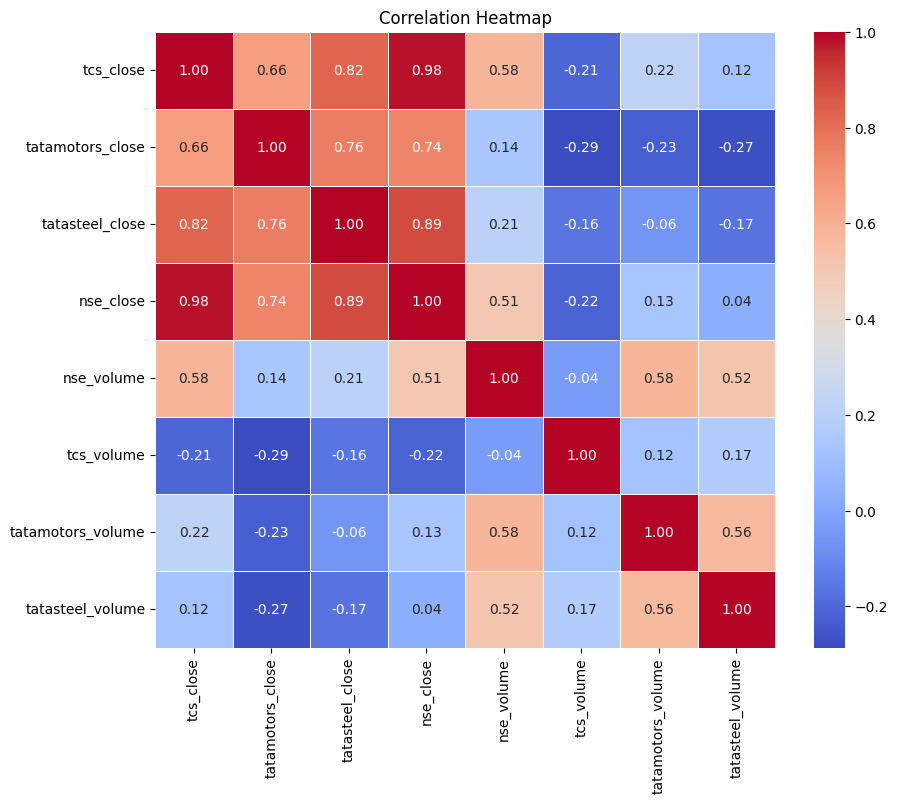

In [9]:
# Checking for correlation
correlation_matrix = df_stock.corr()
#correlation_matrix

#Visualization
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [10]:
# Descriptive statistics of the data in our datarame
round(df_stock.describe(),2)

,tcs_close,tatamotors_close,tatasteel_close,nse_close,nse_volume,tcs_volume,tatamotors_volume,tatasteel_volume
count,4183.00,4183.00,4183.00,4183.00,4183.00,4183.00,4183.0,4.183000e+03
mean,1509.97,336.99,35.29,10243.63,208981.16,3109637.44,19070239.9,7.532418e+07
std,1205.46,217.03,41.06,5617.60,208111.43,2645450.43,24479637.8,5.752310e+07
min,83.73,22.91,4.37,2524.20,0.00,73380.00,62417.0,6.932760e+05
25%,475.39,170.32,13.21,5614.17,0.00,1761968.00,6917220.5,3.919896e+07
50%,1067.22,303.51,17.82,8543.55,183100.00,2450426.00,11276250.0,5.893959e+07
75%,2462.56,444.07,26.25,12277.00,288250.00,3669020.00,20302098.0,9.136298e+07
max,4471.39,1161.85,179.94,26216.05,1811000.00,88067154.00,390577839.0,6.428460e+08


<Axes: title={'center': 'NSE price'}, xlabel='Year', ylabel='Price'>

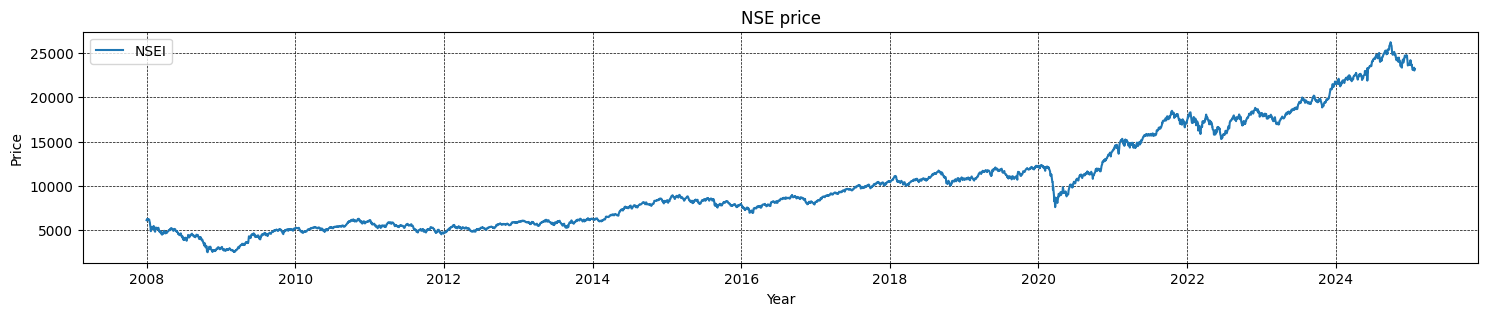

In [15]:
# Visualization
plt.figure(figsize = (18,3))
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("NSE price")
plt.grid(color = "k", linestyle = "--", linewidth = 0.5)
sns.lineplot(data = df_stock, x = df_stock.index, y = df_stock.nse_close, label = "NSEI")

<Axes: title={'center': 'TCS price'}, xlabel='Year', ylabel='Price'>

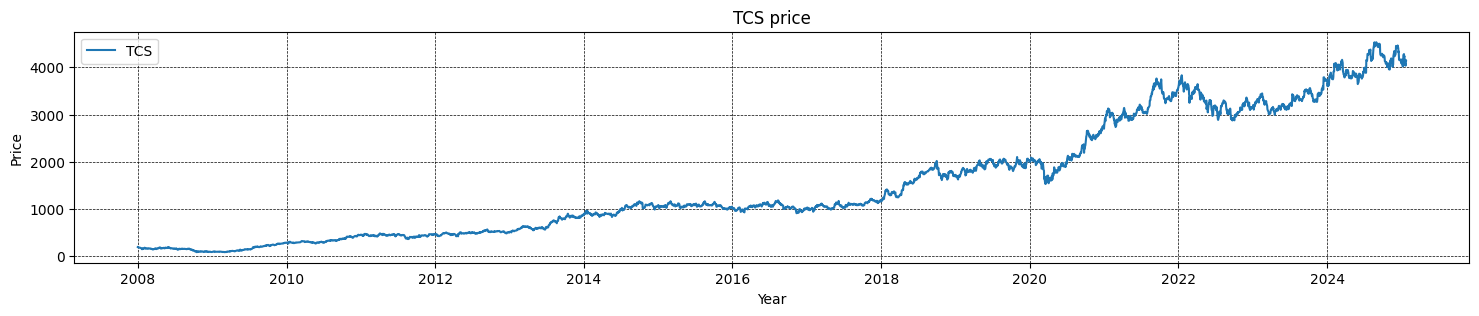

In [16]:
# Visualization
plt.figure(figsize = (18,3))
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("TCS price")
plt.grid(color = "k", linestyle = "--", linewidth = 0.5)
sns.lineplot(data = df_stock, x = df_stock.index, y = df_stock.tcs_close, label = "TCS")

<Axes: title={'center': 'Tata Motors price'}, xlabel='Year', ylabel='Price'>

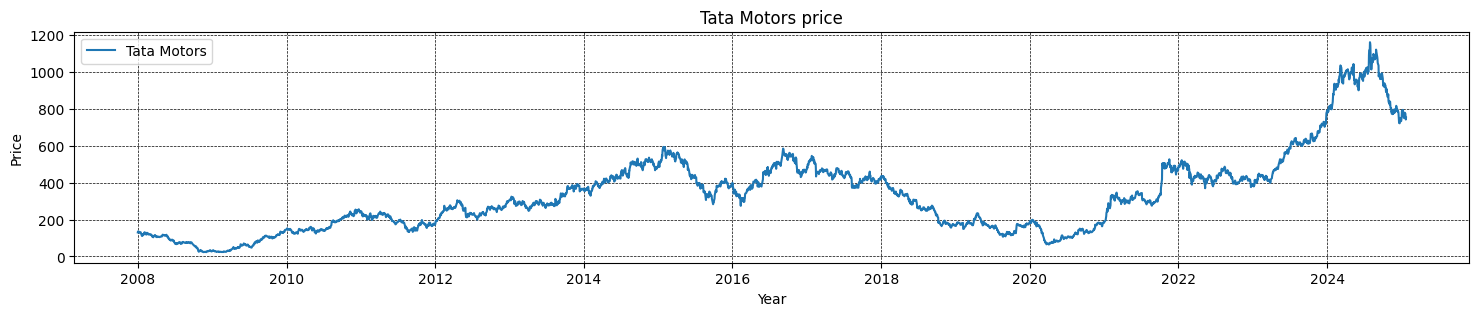

In [17]:
# Visualization
plt.figure(figsize = (18,3))
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Tata Motors price")
plt.grid(color = "k", linestyle = "--", linewidth = 0.5)
sns.lineplot(data = df_stock, x = df_stock.index, y = df_stock.tatamotors_close, label = "Tata Motors")

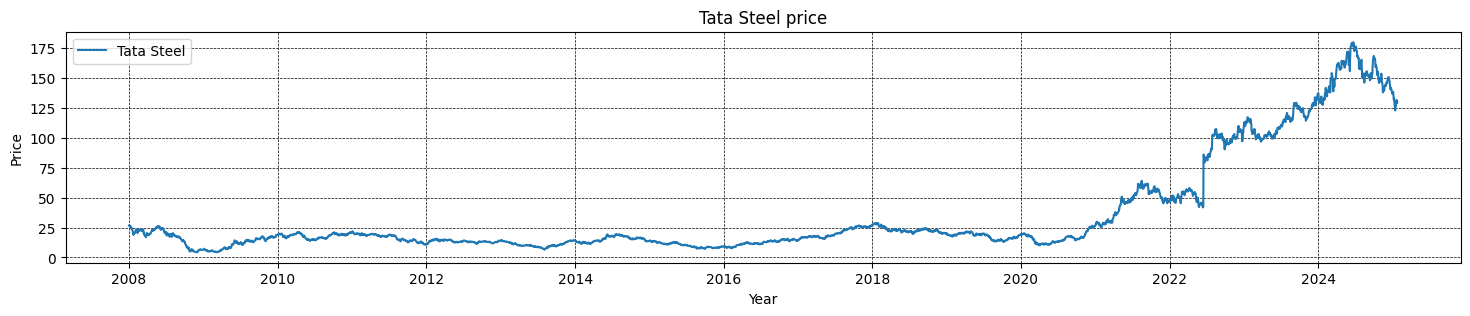

In [18]:
# Visualization
plt.figure(figsize = (18,3))
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Tata Steel price")
plt.grid(color = "k", linestyle = "--", linewidth = 0.5)
sns.lineplot(data = df_stock, x = df_stock.index, y = df_stock.tatasteel_close, label = "Tata Steel")
plt.show()

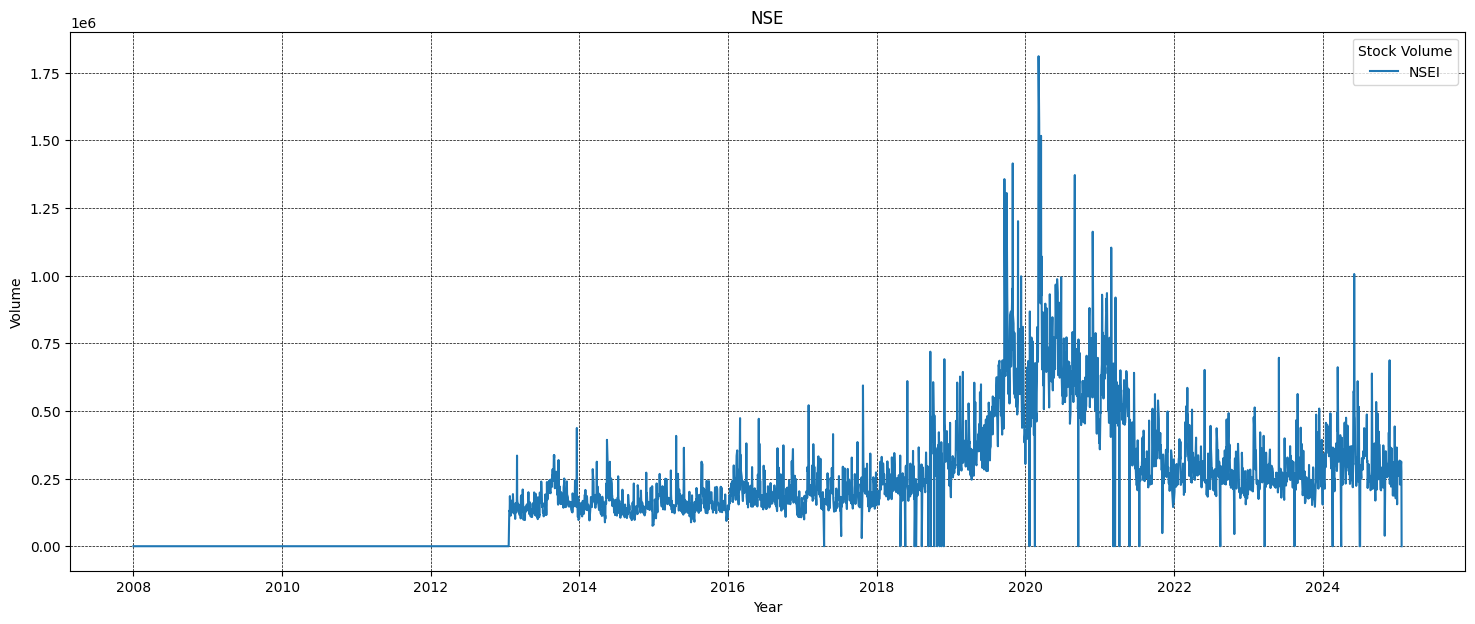

In [16]:
# NSE Volume Visualization
plt.figure(figsize = (18,7))
sns.lineplot(data = df_stock, x = df_stock.index, y = df_stock.nse_volume, label = "NSEI")
plt.xlabel("Year")
plt.ylabel("Volume")
plt.title("NSE")
plt.legend (title = "Stock Volume")
plt.grid(color = "k", linestyle = "--", linewidth = 0.5)
plt.show()

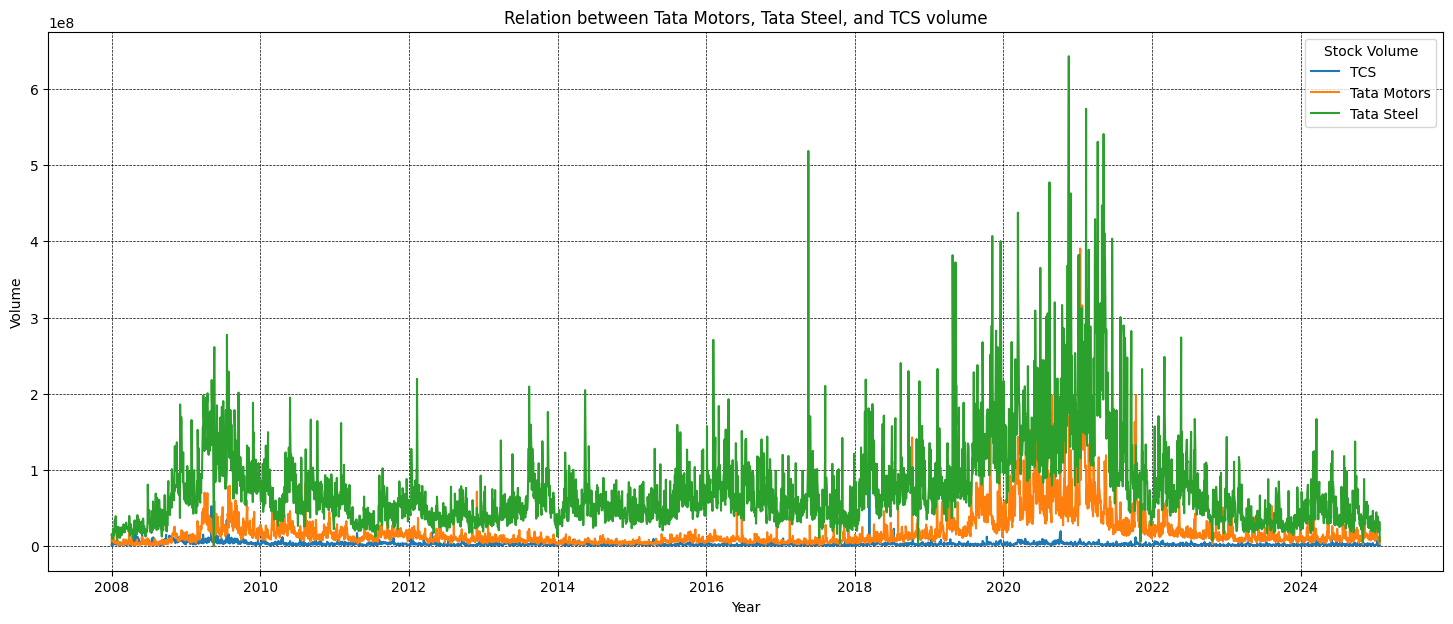

In [17]:
# Tata Volume Visualization
plt.figure(figsize = (18,7))
sns.lineplot(data = df_stock, x = df_stock.index, y = df_stock.tcs_volume, label = "TCS")
sns.lineplot(data = df_stock, x = df_stock.index, y = df_stock.tatamotors_volume, label = "Tata Motors")
sns.lineplot(data = df_stock, x = df_stock.index, y = df_stock.tatasteel_volume, label = "Tata Steel")
plt.xlabel("Year")
plt.ylabel("Volume")
plt.title("Relation between Tata Motors, Tata Steel, and TCS volume")
plt.legend (title = "Stock Volume")
plt.grid(color = "k", linestyle = "--", linewidth = 0.5)
plt.show()

Systemateic Investment Plan (SIP) and Retrun of Investment (ROI) Analysis

In [24]:
# TCS SIP
# variable initialisation
sum_invested_tcs = 0
share_owned_tcs= 0

# Calculating the total investment, shares owned, and average investment per share
# Looping directly over the index
for date in df_stock.index:
    if date.day == 30:  # Check if the day is the 30th
        sum_invested_tcs = sum_invested_tcs + df_stock.loc[date, 'tcs_close']  # Add the closing price of TCS
        share_owned_tcs = share_owned_tcs + 1  # Increment the number of shares owned

# Display results
print("Total Invested in TCS = Rs.", round(sum_invested_tcs, 2))
print("Shares Owned of TCS =", share_owned_tcs)
print("Average Investment per Share = Rs.", round(sum_invested_tcs / share_owned_tcs, 2))
# New line
print("\n")

# Calculating the unrealized profit and rate of investment
last_stock_tcs = round(df_stock.tcs_close.iloc[-1],2)
Profit_Loss_tcs = (last_stock_tcs * share_owned_tcs) - sum_invested_tcs
roi_tcs = Profit_Loss_tcs * 100/sum_invested_tcs

# Display Result
if Profit_Loss_tcs < 0:
    print("Net Unrealized Loss = Rs", round(Profit_Loss_tcs,2))
else:
    print("Net Unrealized Profit = Rs", round(Profit_Loss_tcs,2))

print(f"TCS ROI from 2008-01-01 to {df_stock.index[-1].strftime('%Y-%m-%d')} = {round(roi_tcs,2)}%")

Total Invested in TCS = Rs. 192742.89
Shares Owned of TCS = 129
Average Investment per Share = Rs. 1494.13


Net Unrealized Profit = Rs 344535.66
TCS ROI from 2008-01-01 to 2025-01-23 = 178.75%


In [25]:
# Tata Motors SIP
sum_invested_tatamotors = 0
share_owned_tatamotors = 0

for date in df_stock.index:
  if date.day == 30:
    sum_invested_tatamotors = sum_invested_tatamotors + df_stock.loc[date, "tatamotors_close"]
    share_owned_tatamotors = share_owned_tatamotors + 1

print("Total Invested in Tata Motors =", round(sum_invested_tatamotors, 2))
print("Shares Owned of Tata Motors =", share_owned_tatamotors)
print("Average Investment per Share =", round(sum_invested_tatamotors / share_owned_tatamotors, 2))

print("\n")

last_stock_tatamotors = round(df_stock.tatamotors_close.iloc[-1],2)
Profit_Loss_tatamotors = (last_stock_tatamotors * share_owned_tatamotors) - sum_invested_tatamotors
roi_tatamotors= Profit_Loss_tatamotors * 100/sum_invested_tatamotors
if Profit_Loss_tatamotors < 0:
    print("Net Unrealized Loss = Rs", round(Profit_Loss_tatamotors,2))
else:
    print("Net Unrealized Profit = Rs", round(Profit_Loss_tatamotors,2))

print(f"Tata Motors ROI from 2008-01-01 to {df_stock.index[-1].strftime('%Y-%m-%d')} = {round(roi_tatamotors,2)}%")

Total Invested in Tata Motors = 43223.38
Shares Owned of Tata Motors = 129
Average Investment per Share = 335.06


Net Unrealized Profit = Rs 53694.32
Tata Motors ROI from 2008-01-01 to 2025-01-23 = 124.23%


In [26]:
# Tata Steel SIP
sum_invested_tatasteel = 0
share_owned_tatasteel = 0

for date in df_stock.index:
  if date.day == 30:
    sum_invested_tatasteel = sum_invested_tatasteel + df_stock.loc[date, "tatasteel_close"]
    share_owned_tatasteel = share_owned_tatasteel + 1

print("Total Invested in Tata Steel =", round(sum_invested_tatasteel, 2))
print("Shares Owned of Tata Steel =", share_owned_tatasteel)
print("Average Investment per Share =", round(sum_invested_tatasteel / share_owned_tatasteel, 2))

print("\n")

last_stock_tatasteel = round(df_stock.tatasteel_close.iloc[-1],2)
Profit_Loss_tatasteel = (last_stock_tatasteel * share_owned_tatasteel) - sum_invested_tatasteel
roi_tatasteel= Profit_Loss_tatasteel * 100/sum_invested_tatasteel
if Profit_Loss_tatasteel < 0:
    print("Net Unrealized Loss = Rs", round(Profit_Loss_tatasteel,2))
else:
    print("Net Unrealized Profit = Rs", round(Profit_Loss_tatasteel,2))

print(f"Tata Steel ROI from 2008-01-01 to {df_stock.index[-1].strftime('%Y-%m-%d')} = {round(roi_tatasteel,2)}%")

Total Invested in Tata Steel = 4443.25
Shares Owned of Tata Steel = 129
Average Investment per Share = 34.44


Net Unrealized Profit = Rs 12366.74
Tata Steel ROI from 2008-01-01 to 2025-01-23 = 278.33%


In [27]:
# NSE SIP
sum_invested_nse = 0
share_owned_nse= 0

for date in df_stock.index:
  if date.day == 30:
    sum_invested_nse = sum_invested_nse + df_stock.loc[date, "nse_close"]
    share_owned_nse = share_owned_nse + 1

print("Total Invested in NSE =", round(sum_invested_nse, 2))
print("Shares Owned of NSE =", share_owned_nse)
print("Average Investment per Share =", round(sum_invested_nse / share_owned_nse, 2))

print("\n")

last_stock_nse = round(df_stock.nse_close.iloc[-1],2)
Profit_Loss_nse = (last_stock_nse * share_owned_nse) - sum_invested_nse
roi_nse= Profit_Loss_nse * 100/sum_invested_nse
if Profit_Loss_tatasteel < 0:
    print("Net Unrealized Loss = Rs", round(Profit_Loss_nse,2))
else:
    print("Net Unrealized Profit = Rs", round(Profit_Loss_nse,2))

print(f"Tata Steel ROI from 2008-01-01 to {df_stock.index[-1].strftime('%Y-%m-%d')} = {round(roi_nse,2)}%")

Total Invested in NSE = 1308508.05
Shares Owned of NSE = 129
Average Investment per Share = 10143.47


Net Unrealized Profit = Rs 1685504.55
Tata Steel ROI from 2008-01-01 to 2025-01-23 = 128.81%


Text(0.5, 1.0, 'Gain comparision')

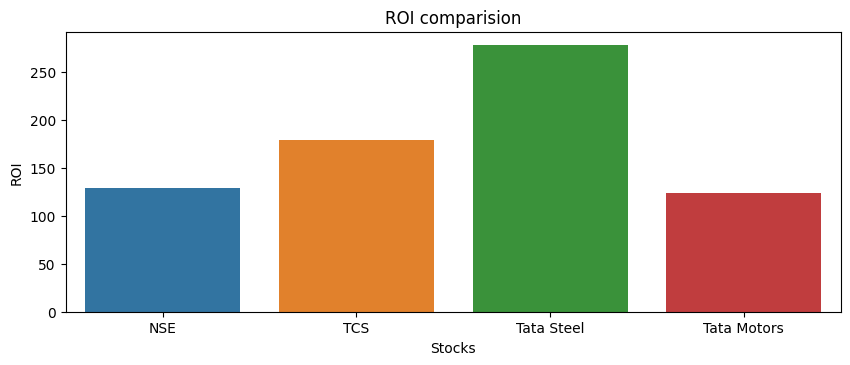

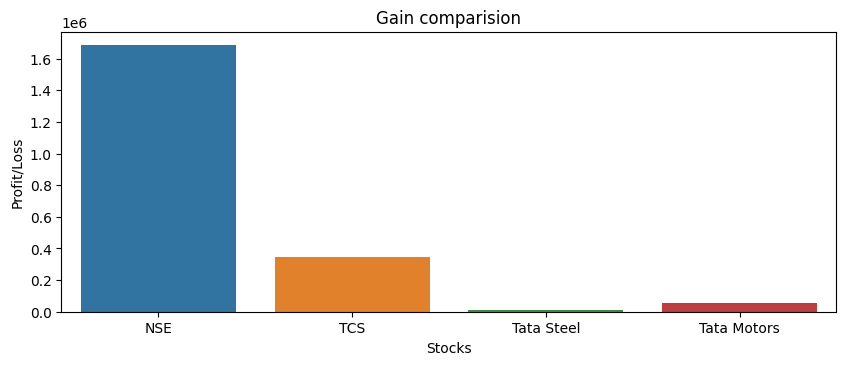

In [35]:
# ROI Visualization
plt.figure(figsize = (10,8))
plt.subplot(2,1,1)
ROI = [roi_nse, roi_tcs, roi_tatasteel, roi_tatamotors]
stocks = ["NSE", "TCS", "Tata Steel", "Tata Motors"]
sns.barplot(x = stocks, y = ROI, hue = stocks)
plt.xlabel("Stocks")
plt.ylabel("ROI")
plt.title("ROI comparision")

# Gain/Loss Visualization
plt.figure(figsize = (10,8))
plt.subplot(2,1,2)
Profit_Loss = [Profit_Loss_nse, Profit_Loss_tcs, Profit_Loss_tatasteel, Profit_Loss_tatamotors]
stocks = ["NSE", "TCS", "Tata Steel", "Tata Motors"]
sns.barplot(x = stocks, y = Profit_Loss, hue = stocks)
plt.xlabel("Stocks")
plt.ylabel("Profit/Loss")
plt.title("Gain comparision")

Golden and Death cross Analysis

In [44]:
#200 day vs 50 day rolling average
#nse
nse_roll_avg_200 = df_stock.nse_close.rolling(200).mean()
nse_roll_avg_50 = df_stock.nse_close.rolling(50).mean()
#tcs
tcs_roll_avg_200 = df_stock.tcs_close.rolling(200).mean()
tcs_roll_avg_50 = df_stock.tcs_close.rolling(50).mean()
#tata motors
tm_roll_avg_200 = df_stock.tatamotors_close.rolling(200).mean()
tm_roll_avg_50 = df_stock.tatamotors_close.rolling(50).mean()
#tata steel
ts_roll_avg_200 = df_stock.tatasteel_close.rolling(200).mean()
ts_roll_avg_50 = df_stock.tatasteel_close.rolling(50).mean()

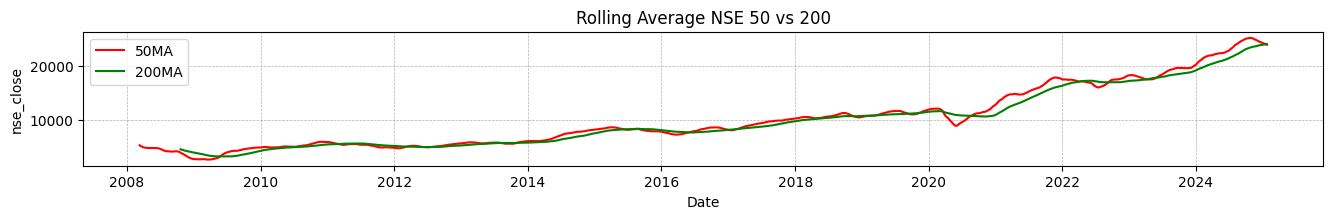

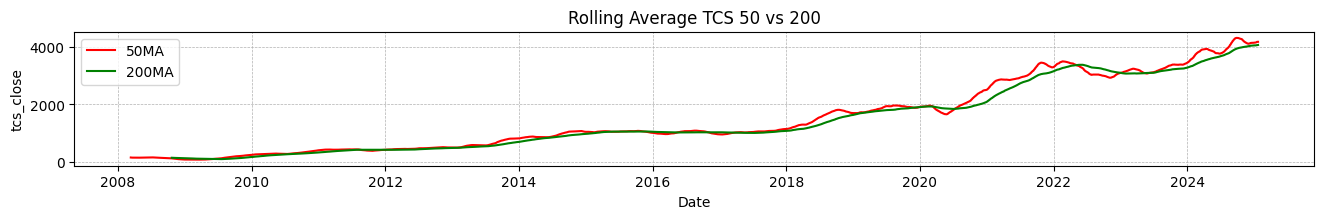

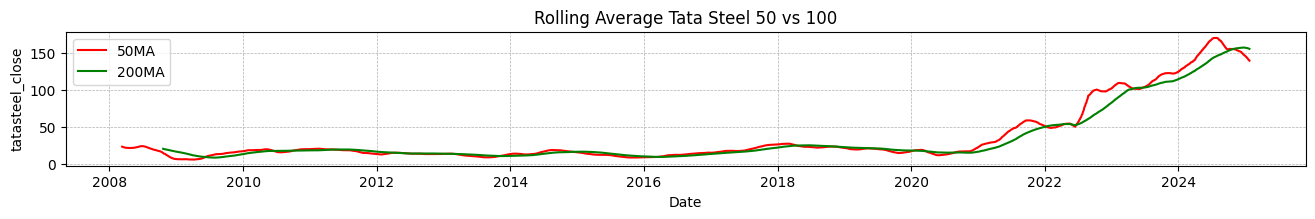

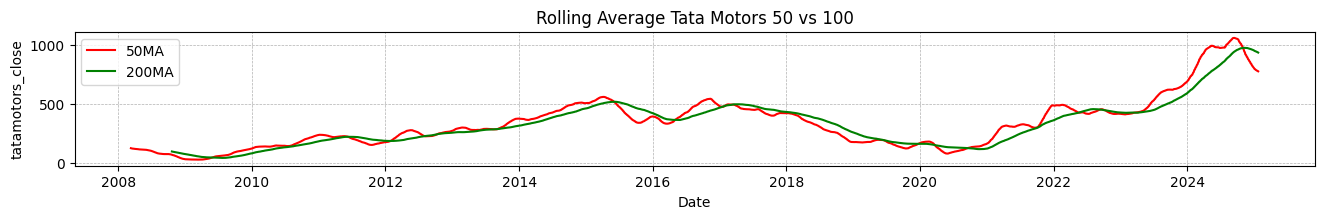

In [45]:
# Visualization
plt.figure(figsize = (16,8))
plt.subplot(4,1,1)
plt.title("Rolling Average NSE 50 vs 200")
#sns.lineplot(data = df_stock.nse_close)
sns.lineplot(data = nse_roll_avg_50, color = "r", label = "50MA")
sns.lineplot(data = nse_roll_avg_200,color = "g", label = "200MA")
plt.grid(linestyle = "--", linewidth = 0.5)
plt.figure(figsize = (16,8))
plt.subplot(4,1,2)
plt.title("Rolling Average TCS 50 vs 200")
#sns.lineplot(data = df_stock.tcs_close)
sns.lineplot(data = tcs_roll_avg_50, color = "r", label = "50MA")
sns.lineplot(data = tcs_roll_avg_200, color = "g", label = "200MA")
plt.grid(linestyle = "--", linewidth = 0.5)
plt.figure(figsize = (16,8))
plt.subplot(4,1,4)
plt.title("Rolling Average Tata Steel 50 vs 100")
#sns.lineplot(data = df_stock.tcs_close)
sns.lineplot(data = ts_roll_avg_50, color = "r", label = "50MA")
sns.lineplot(data = ts_roll_avg_200, color = "g", label = "200MA")
plt.grid(linestyle = "--", linewidth = 0.5)
plt.figure(figsize = (16,8))
plt.subplot(4,1,4)
plt.title("Rolling Average Tata Motors 50 vs 100")
#sns.lineplot(data = df_stock.tcs_close)
sns.lineplot(data = tm_roll_avg_50, color = "r", label = "50MA")
sns.lineplot(data = tm_roll_avg_200, color = "g", label = "200MA")
plt.grid(linestyle = "--", linewidth = 0.5)

plt.show()

Annual Return Analysis

In [117]:
#Annual Return - Day-wise percentage calculation
#nse_return
df_stock["nse_return"] = df_stock["nse_close"].pct_change()
#tcs_return
df_stock["tcs_return"] = df_stock["tcs_close"].pct_change()
#tata motors returns
df_stock["tm_return"] = df_stock["tatamotors_close"].pct_change()
#tata steel returns
df_stock["ts_return"] = df_stock["tatasteel_close"].pct_change()

df_stock.head()

,tcs_close,tatamotors_close,tatasteel_close,nse_close,nse_volume,tcs_volume,tatamotors_volume,tatasteel_volume,nse_return,tcs_return,tm_returns,ts_return,tm_return
Date,,,,,,,,,,,,,
2008-01-02,192.184402,135.454437,26.711016,6179.399902,0.0,2864924,10611582,15938538,NaN,NaN,0.040926,NaN,NaN
2008-01-03,185.055222,135.121613,26.499285,6178.549805,0.0,5168280,10581493,15642150,-0.000138,-0.037096,-0.002457,-0.007927,-0.002457
2008-01-04,183.984467,133.423187,26.648067,6274.299805,0.0,2318868,9271718,9810045,0.015497,-0.005786,-0.012570,0.005615,-0.012570
2008-01-07,178.566650,134.063293,26.489265,6279.100098,0.0,3647344,7606509,9657369,0.000765,-0.029447,0.004798,-0.005959,0.004798
2008-01-08,180.808807,132.270996,25.502146,6287.850098,0.0,3207732,7345470,22797769,0.001394,0.012556,-0.013369,-0.037265,-0.013369


In [118]:
# Dropping the NaN value
df_stock.dropna(inplace = True)
df_stock.head()

,tcs_close,tatamotors_close,tatasteel_close,nse_close,nse_volume,tcs_volume,tatamotors_volume,tatasteel_volume,nse_return,tcs_return,tm_returns,ts_return,tm_return
Date,,,,,,,,,,,,,
2008-01-03,185.055222,135.121613,26.499285,6178.549805,0.0,5168280,10581493,15642150,-0.000138,-0.037096,-0.002457,-0.007927,-0.002457
2008-01-04,183.984467,133.423187,26.648067,6274.299805,0.0,2318868,9271718,9810045,0.015497,-0.005786,-0.012570,0.005615,-0.012570
2008-01-07,178.566650,134.063293,26.489265,6279.100098,0.0,3647344,7606509,9657369,0.000765,-0.029447,0.004798,-0.005959,0.004798
2008-01-08,180.808807,132.270996,25.502146,6287.850098,0.0,3207732,7345470,22797769,0.001394,0.012556,-0.013369,-0.037265,-0.013369
2008-01-09,182.355469,131.468750,25.573673,6272.000000,0.0,2450128,6054977,13003782,-0.002521,0.008554,-0.006065,0.002805,-0.006065


In [119]:
# Descriptive Statistics analysis for Returns
df_stock[["nse_return","tcs_return","tm_return","ts_return"]].describe()

,nse_return,tcs_return,tm_return,ts_return
count,4181.000000,4181.000000,4181.000000,4181.000000
mean,0.000403,0.000907,0.000805,0.000802
std,0.013150,0.018531,0.028267,0.030650
min,-0.129805,-0.106906,-0.175827,-0.151194
25%,-0.005320,-0.008195,-0.013369,-0.013199
50%,0.000660,0.000521,0.000000,0.000393
75%,0.006579,0.009617,0.014210,0.013899
max,0.177441,0.154957,0.359480,1.005783


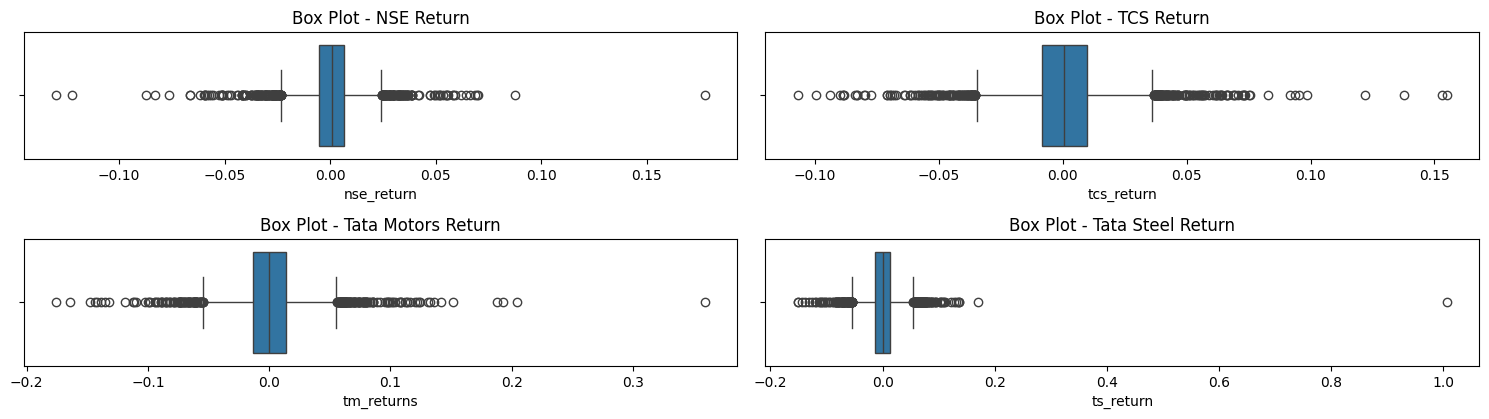

In [120]:
# Visualization
# boxplot to identify the outliers and genral direction of the returns
plt.figure(figsize = (15,8))
plt.subplot(4,2,1) # Plot the top left subplot
sns.boxplot(x = df_stock.nse_return)
plt.title("Box Plot - NSE Return")

plt.subplot(4,2,2) # Plot the top right subplot
sns.boxplot(x = df_stock.tcs_return)
plt.title("Box Plot - TCS Return")

plt.subplot(4,2,3) # Plot the down left subplot
sns.boxplot(x = df_stock.tm_returns)
plt.title("Box Plot - Tata Motors Return")

plt.subplot(4,2,4) # Plot the down right subplot
sns.boxplot(x = df_stock.ts_return)
plt.title("Box Plot - Tata Steel Return")

plt.tight_layout()  # Adjust spacing between subplots

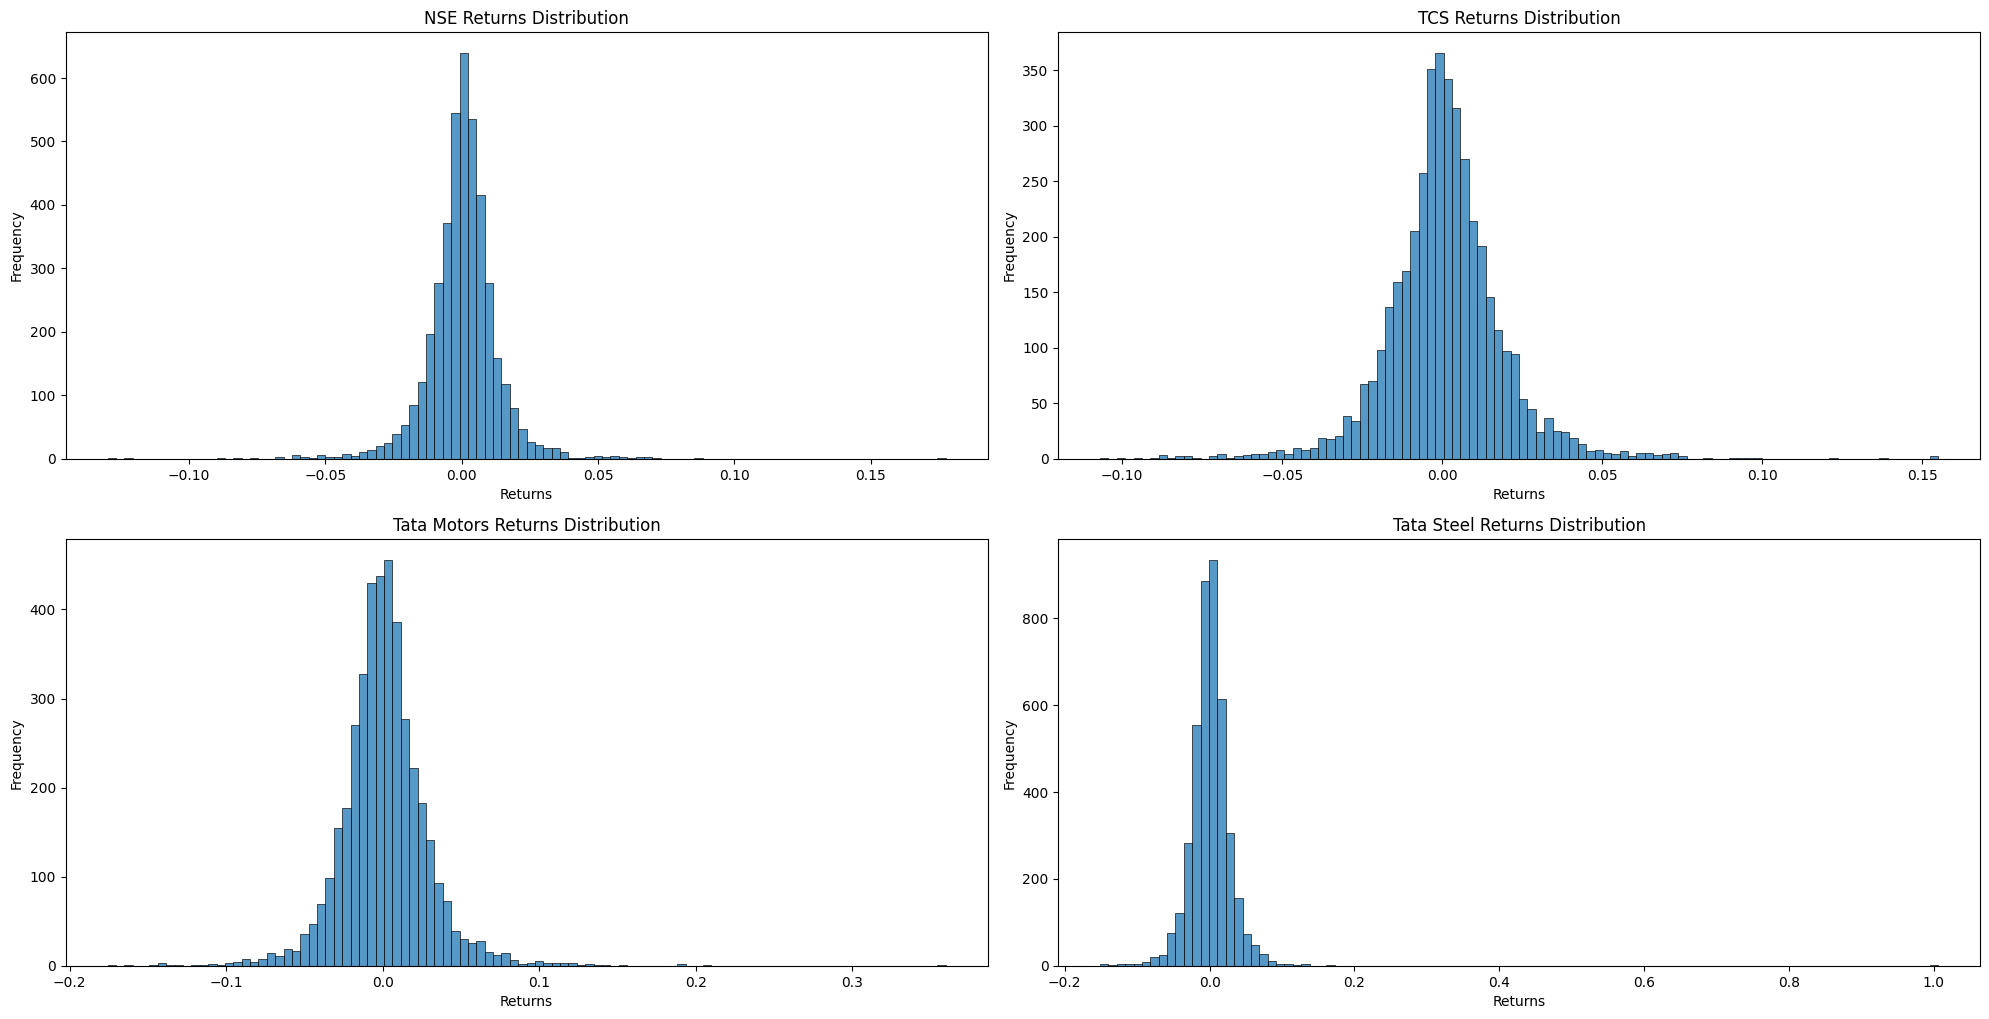

In [121]:
# Visualization
# Distribution plot
plt.figure(figsize=(20,20))
# Plot NSE returns on the left subplot
plt.subplot(4,2,1)
sns.histplot(data = df_stock.nse_return, bins=100)
plt.title("NSE Returns Distribution")
plt.xlabel("Returns")
plt.ylabel("Frequency")

# Plot TCS returns on the right subplot
plt.subplot(4,2,2)
sns.histplot(data =df_stock.tcs_return, bins=100)
plt.title("TCS Returns Distribution")
plt.xlabel("Returns")
plt.ylabel("Frequency")
# Plot TCS returns on the right subplot
plt.subplot(4,2,3)
sns.histplot(data = df_stock.tm_returns, bins=100)
plt.title("Tata Motors Returns Distribution")
plt.xlabel("Returns")
plt.ylabel("Frequency")
# Plot TCS returns on the right subplot
plt.subplot(4,2,4)
sns.histplot(data = df_stock.ts_return, bins=100)
plt.title("Tata Steel Returns Distribution")
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

Beta Analysis

In [130]:
# Measure the stock volatility with respective to broad market
# storing the market and individual stock returns to variabales and make sure it does not contain any Nan values.
df_cov_tcs = df_stock[['tcs_return','nse_return']].dropna()
df_cov_tm = df_stock[['tm_return','nse_return']].dropna()
df_cov_ts = df_stock[['ts_return','nse_return']].dropna()

# Calculate covariance between TCS and NSE returns, Tata Motors and NSE returns, and Tata Steel and NSE returns
covariance_tcs = np.cov(df_cov_tcs.tcs_return,df_cov_tcs.nse_return)[0][1]
covariance_tm = np.cov(df_cov_tm.tm_return,df_cov_tm.nse_return)[0][1]
covariance_ts = np.cov(df_cov_ts.ts_return,df_cov_ts.nse_return)[0][1]

# Calculate variance of NSE returns (market)
market_variance_tcs = np.var(df_cov_tcs.nse_return)
market_variance_tm = np.var(df_cov_tm.nse_return)
market_variance_ts = np.var(df_cov_ts.nse_return)

# beta = covariance between stock with market returns/ variance of the market returns
beta_tcs = round(covariance_tcs/market_variance_tcs,2)
beta_tm = round(covariance_tm/market_variance_tm,2)
beta_ts = round(covariance_ts/market_variance_ts,2)

In [142]:
# Defined a function that will print statement based on the beta value
def beta_result(beta):
  if beta > 1:
    print(f"Beta: {beta} [Red: Stock is more volatile than the market]")
  elif beta < 1:
    print(f"Beta: {beta} [Green: Stock is less volatile than the market]")
  else:
    print(f"Beta: {beta} [Market Inline: Stock moves in line with the market]")

# Defined a function which will take the beta value and beta type.
def beta_evaluation(beta_value, beta_type):
  if beta_type == "beta_tcs":
    print("Beta analysis: TCS vs Market")
    beta_result(beta_value) # calling beta_result function if true for beta_type is TCS
  elif beta_type == "beta_tm":
    print("Beta analysis: Tata Motors vs Market")
    beta_result(beta_value) # calling beta_result function if true for beta_type is Tata Motors
  else:
    print("Beta analysis: Tata Steel vs Market")
    beta_result(beta_value) # calling beta_result function if true for beta_type is Tata Steel

# Created a dictionary which will store the beta_type as key and its value as beta_value
beta_list = {"beta_tcs": beta_tcs,
             "beta_tm": beta_tm,
             "beta_ts": beta_ts}
# Looping the key and value from the dictionary and calling the beta_evaluation function
for beta_key, beta_value in beta_list.items():
  beta_evaluation(beta_value, beta_key)

Beta analysis: TCS vs Market
Beta: 0.76 [Green: Stock is less volatile than the market]
Beta analysis: Tata Motors vs Market
Beta: 1.29 [Red: Stock is more volatile than the market]
Beta analysis: Tata Steel vs Market
Beta: 1.32 [Red: Stock is more volatile than the market]
